In [12]:
import matplotlib.pyplot as plt
import math

In [28]:
axial_tree_string = "F[+F][-F[-F]F]F[+F][-F]"
delta = math.radians(45)
l = 1

In [47]:
def create_line_segments_from_bracketed_ol_system(axial_tree_string, delta, l):
    (x0, y0) = (0, 0)
    line_segments = [((x0, y0), (x0, y0))]
    states = [((x0, y0), math.radians(90))]
    current_state = states[0]
    for c in axial_tree_string:
        if c == 'F':
            current_point = current_state[0]
            new_point = (current_point[0] + l*math.cos(current_state[1]), current_point[1] + l*math.sin(current_state[1]))
            line_segments.append((current_point, new_point))
            current_state = ((new_point), current_state[1])
        if c == '[':
            states.append(current_state)
        if c == ']':
            current_state = states.pop()
        if  c == '+':
            temp_state = current_state
            current_state = (temp_state[0], current_state[1] + delta)
        if  c == '-':
            temp_state = current_state
            current_state = (temp_state[0], current_state[1] - delta)
    return line_segments

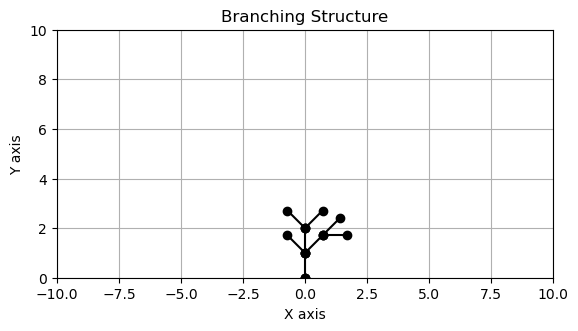

In [48]:
def plot_line_segment(start_point, end_point, ax):
    """Plot a line segment between two points."""
    x_values = [start_point[0], end_point[0]]
    y_values = [start_point[1], end_point[1]]
    ax.plot(x_values, y_values, marker='o', color='black')  # You can specify different colors

# Set up plot
fig, ax = plt.subplots()
ax.set_aspect('equal')
plt.grid(True)
plt.title('Branching Structure')
plt.xlabel('X axis')
plt.ylabel('Y axis')

line_segments = create_line_segments_from_bracketed_ol_system(axial_tree_string, delta, l)
# Plot each branch
for line_segment in line_segments:
    plot_line_segment(line_segment[0], line_segment[1], ax)

# Setting plot limits
plt.xlim(-10, 10)
plt.ylim(0, 10)

# Show plot
plt.show()